<a href="https://colab.research.google.com/github/rajeshSharma07/FSD/blob/main/Random_forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv('energydata_complete.csv')

# Display the first few rows of the dataset
print(data.head())

# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [ ]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Optional: Drop any rows with missing values if any exist
data.dropna(inplace=True)

# Check the shape of the data after preprocessing
print(data.shape)


(19735, 28)


In [ ]:
# Define the target variable and features
target = 'Appliances'
features = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9',
            'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7',
            'RH_8', 'RH_9', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint']

# Prepare the feature set (X) and target variable (y)
X = data[features]
y = data[target]

# Display the first few rows of features and target
print(X.head())
print(y.head())


                        T1    T2     T3         T4         T5        T6  \
date                                                                      
2016-01-11 17:00:00  19.89  19.2  19.79  19.000000  17.166667  7.026667   
2016-01-11 17:10:00  19.89  19.2  19.79  19.000000  17.166667  6.833333   
2016-01-11 17:20:00  19.89  19.2  19.79  18.926667  17.166667  6.560000   
2016-01-11 17:30:00  19.89  19.2  19.79  18.890000  17.166667  6.433333   
2016-01-11 17:40:00  19.89  19.2  19.79  18.890000  17.200000  6.366667   

                            T7    T8         T9       RH_1  ...       RH_4  \
date                                                        ...              
2016-01-11 17:00:00  17.200000  18.2  17.033333  47.596667  ...  45.566667   
2016-01-11 17:10:00  17.200000  18.2  17.066667  46.693333  ...  45.992500   
2016-01-11 17:20:00  17.200000  18.2  17.000000  46.300000  ...  45.890000   
2016-01-11 17:30:00  17.133333  18.1  17.000000  46.066667  ...  45.723333   
2016-0

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f'Train set shape: {X_train.shape}, Test set shape: {X_test.shape}')

model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
model.fit(X_train, y_train)



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

 #Initialize and train the random forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)



Train set shape: (15788, 22), Test set shape: (3947, 22)


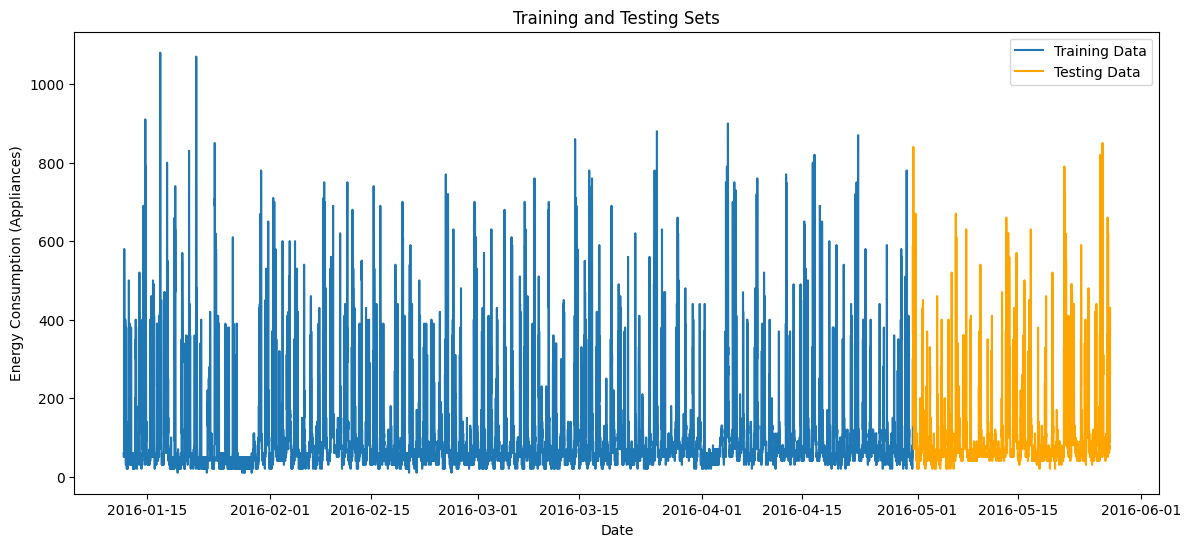

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_train and y_test are your target variables (Energy Consumption)
# If you're working with time series data, it should have a proper date index

plt.figure(figsize=(14, 6))

# Plotting training data (assuming y_train is your target for training)
plt.plot(y_train.index, y_train, label='Training Data')

# Plotting testing data (assuming y_test is your target for testing)
plt.plot(y_test.index, y_test, label='Testing Data', color='orange')

plt.title('Training and Testing Sets')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Appliances)')
plt.legend()
plt.show()


In [ ]:
# Display the first few rows of the training set
print("Training Set Features (X_train):")
print(X_train.head())

print("\nTraining Set Target (y_train):")
print(y_train.head())

# Display the first few rows of the testing set
print("\nTesting Set Features (X_test):")
print(X_test.head())

print("\nTesting Set Target (y_test):")
print(y_test.head())


Training Set Features (X_train):
                        T1    T2     T3         T4         T5        T6  \
date                                                                      
2016-01-11 17:00:00  19.89  19.2  19.79  19.000000  17.166667  7.026667   
2016-01-11 17:10:00  19.89  19.2  19.79  19.000000  17.166667  6.833333   
2016-01-11 17:20:00  19.89  19.2  19.79  18.926667  17.166667  6.560000   
2016-01-11 17:30:00  19.89  19.2  19.79  18.890000  17.166667  6.433333   
2016-01-11 17:40:00  19.89  19.2  19.79  18.890000  17.200000  6.366667   

                            T7    T8         T9       RH_1  ...       RH_4  \
date                                                        ...              
2016-01-11 17:00:00  17.200000  18.2  17.033333  47.596667  ...  45.566667   
2016-01-11 17:10:00  17.200000  18.2  17.066667  46.693333  ...  45.992500   
2016-01-11 17:20:00  17.200000  18.2  17.000000  46.300000  ...  45.890000   
2016-01-11 17:30:00  17.133333  18.1  17.000000  46

In [ ]:
# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Confirm the model has been trained
print("Random Forest model trained successfully.")


Random Forest model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Display the first few predictions
print("Predictions on the test set:")
print(y_pred[:10])


Predictions on the test set:
[171.3 124.5  95.4  84.8  82.2  85.8  83.   89.9  89.5  93.4]


In [ ]:
# Evaluate the model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
#mae = mean_absolute_error(y_test, y_pred)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation metrics
#print(f'Mean Absolute Error (MAE): {mae}')
#print(f'Root Mean Squared Error (RMSE): {rmse}')
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

#R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 29.723030149480618
Mean Squared Error (MSE): 3977.7302812262483
Root Mean Squared Error (RMSE): 63.069249886345155
R-squared (R²): 0.6025088366002413


In [ ]:
feature_importances = model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: T1, Importance: 0.03559290555666598
Feature: T2, Importance: 0.03738139146046033
Feature: T3, Importance: 0.050779328919013315
Feature: T4, Importance: 0.03958975278779689
Feature: T5, Importance: 0.035886097517856874
Feature: T6, Importance: 0.034145958632069796
Feature: T7, Importance: 0.028976080824184607
Feature: T8, Importance: 0.039306352902126286
Feature: T9, Importance: 0.023431792211397098
Feature: RH_1, Importance: 0.06642952753418833
Feature: RH_2, Importance: 0.05440199470445705
Feature: RH_3, Importance: 0.05374354991470963
Feature: RH_4, Importance: 0.037769210162242786
Feature: RH_5, Importance: 0.05873885270914182
Feature: RH_6, Importance: 0.04109835680462848
Feature: RH_7, Importance: 0.04571622227288768
Feature: RH_8, Importance: 0.05104733025187846
Feature: RH_9, Importance: 0.041836303949212644
Feature: T_out, Importance: 0.029927865199459263
Feature: RH_out, Importance: 0.054421432831389845
Feature: Press_mm_hg, Importance: 0.0546417861850323
Feature: Win

In [ ]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to get the average score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE: {np.mean(-cv_scores)}")


Cross-validated MAE: 122.1096275652394


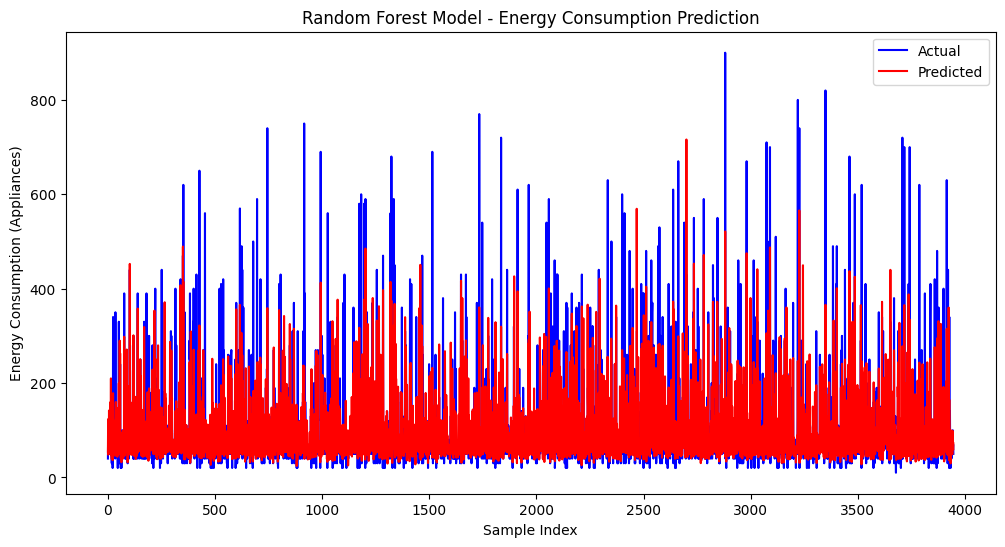

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.legend()
plt.title('Random Forest Model - Energy Consumption Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Energy Consumption (Appliances)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load and preprocess your data
data = pd.read_csv('energydata_complete.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Prepare features and target variable
X = data.drop(columns=['Appliances'])
y = data['Appliances']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions for the test set
y_pred = model.predict(X_test)

# Prepare future dates for prediction
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame(index=future_dates)

# Example: Fill future features (make sure these match your training features)
for column in X.columns:
    future_features[column] = X[column].mean()  # Replace with appropriate logic for future feature values

# Make predictions for the future
future_predictions = model.predict(future_features)

# Combine results into a DataFrame
future_results = pd.DataFrame({
    'Date': future_dates,
    'Predicted Energy Consumption (Wh)': future_predictions
})

# Daily, weekly, and monthly aggregations
print("Daily Predictions:")
print(future_results)

# Weekly Predictions
future_results['Week'] = future_results['Date'].dt.isocalendar().week
weekly_predictions = future_results.groupby('Week')['Predicted Energy Consumption (Wh)'].sum().reset_index()
print("\nWeekly Predictions:")
print(weekly_predictions)

# Monthly Predictions
future_results['Month'] = future_results['Date'].dt.month
monthly_predictions = future_results.groupby('Month')['Predicted Energy Consumption (Wh)'].sum().reset_index()
print("\nMonthly Predictions:")
print(monthly_predictions)
future_results['Year'] = future_results['Date'].dt.year
yearly_predictions = future_results.groupby('Year')['Predicted Energy Consumption (Wh)'].sum().reset_index()
print("\nYearly Predictions:")
print(yearly_predictions)


Daily Predictions:
                  Date  Predicted Energy Consumption (Wh)
0  2016-05-28 18:00:00                               63.8
1  2016-05-29 18:00:00                               63.8
2  2016-05-30 18:00:00                               63.8
3  2016-05-31 18:00:00                               63.8
4  2016-06-01 18:00:00                               63.8
5  2016-06-02 18:00:00                               63.8
6  2016-06-03 18:00:00                               63.8
7  2016-06-04 18:00:00                               63.8
8  2016-06-05 18:00:00                               63.8
9  2016-06-06 18:00:00                               63.8
10 2016-06-07 18:00:00                               63.8
11 2016-06-08 18:00:00                               63.8
12 2016-06-09 18:00:00                               63.8
13 2016-06-10 18:00:00                               63.8
14 2016-06-11 18:00:00                               63.8
15 2016-06-12 18:00:00                               

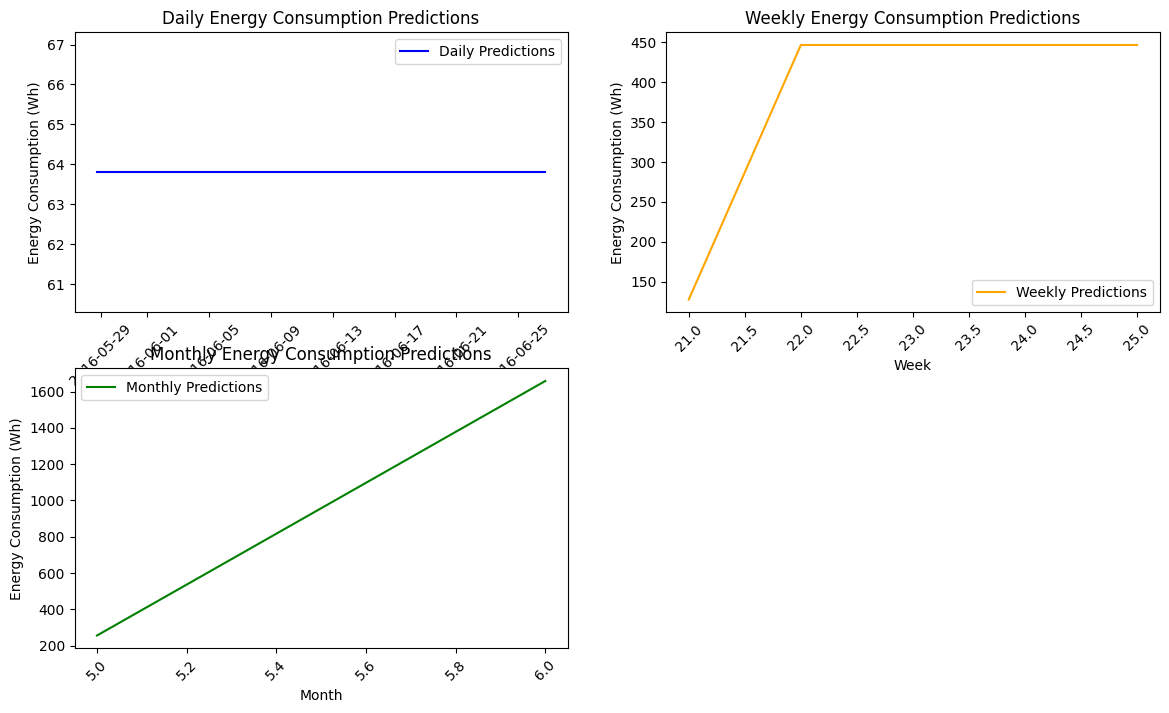

In [ ]:
plt.figure(figsize=(14, 8))

# Plot daily predictions
plt.subplot(2, 2, 1)
plt.plot(future_results['Date'], future_results['Predicted Energy Consumption (Wh)'], label='Daily Predictions', color='blue')
plt.title('Daily Energy Consumption Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.legend()

# Plot weekly predictions
plt.subplot(2, 2, 2)
plt.plot(weekly_predictions['Week'], weekly_predictions['Predicted Energy Consumption (Wh)'], label='Weekly Predictions', color='orange')
plt.title('Weekly Energy Consumption Predictions')
plt.xlabel('Week')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.legend()

# Plot monthly predictions
plt.subplot(2, 2, 3)
plt.plot(monthly_predictions['Month'], monthly_predictions['Predicted Energy Consumption (Wh)'], label='Monthly Predictions', color='green')
plt.title('Monthly Energy Consumption Predictions')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.legend()
plt.show()